In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm 
from fastjmd95 import jmd95numba 

#path
PATH_smooth = '/scratch/ab10313/pleiades/04_equator_atlantic_smooth/'

PATH_PP = '/scratch/ab10313/pleiades/04_equator_atlantic_smooth/preprcossed_data/'
# load data


lat = xr.open_dataarray('/scratch/ab10313/pleiades/04_equator_atlantic_smooth/preprcossed_data/lat.nc',engine="h5netcdf")
lon = xr.open_dataarray('/scratch/ab10313/pleiades/04_equator_atlantic_smooth/preprcossed_data/lon.nc',engine="h5netcdf")

In [13]:
WB = xr.open_dataarray(PATH_PP+'WB.nc',engine="h5netcdf")
B_x = xr.open_dataarray(PATH_PP+'B_x.nc',engine="h5netcdf")
B_y = xr.open_dataarray(PATH_PP+'B_y.nc',engine="h5netcdf")

In [14]:
ds_T = xr.open_dataset(PATH_smooth+'3d_data/ds_T.nc',engine="h5netcdf")

In [17]:
dx = B_x.dxF.mean()
WB_cross_spectra = xr.open_dataarray(PATH_PP+'WB_cross_spectra_z.nc')
k_r = WB_cross_spectra.freq_r/dx/1e-3

Text(0.5, 1.0, 'isotropic wb cross-spectrum')

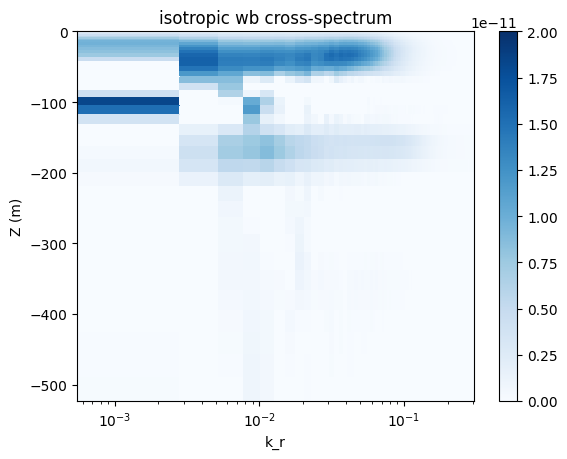

In [22]:
plt.pcolor(k_r, ds_T.Z[:40], WB_cross_spectra.real[:40,:]*k_r, cmap='Blues',vmin=0, vmax=2e-11)
plt.xscale("log")
plt.xlabel('k_r')
plt.ylabel('Z (m)')
plt.colorbar()
plt.title('isotropic wb cross-spectrum')

In [5]:
from PIL import Image
import os
def create_animation(fun, idx, filename='Bgrad_WB_new.gif', dpi=None, FPS=24, loop=0):
    '''
    See https://pythonprogramming.altervista.org/png-to-gif/
    fun(i) - a function creating one snapshot, has only one input:
        - number of frame i
    idx - range of frames, i in idx
    FPS - frames per second
    filename - animation name
    dpi - set 300 or so to increase quality
    loop - number of repeats of the gif
    '''
    frames = []
    for i in idx:
        fun(i)
        plt.savefig('.frame.png', dpi=dpi)
        plt.close()
        frames.append(Image.open('.frame.png'))
        print(f'Frame {i} is created', end='\r')
    os.system('rm .frame.png')
    # How long to persist one frame in milliseconds to have a desired FPS
    duration = 1000 / FPS
    print(f'Animation at FPS={FPS} will last for {len(idx)/FPS} seconds')
    frames[0].save(
        filename, format='GIF',
        append_images=frames[1:],
        save_all=True,
        duration=duration,
        loop=loop)

In [6]:
import pandas as pd 
#plt.rcParams['text.usetex'] = True

def fun(j):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    
    plt.subplot(121)
    plt.pcolor(lat, lon, grad_B_norm.isel(time=j),cmap='coolwarm', vmin=-3, vmax=3)
    ts = pd.to_datetime(WB.time[j].values) 
    d = ts.strftime('%Y.%m.%d')
    plt.title(r'$|\nabla b|$, time = '+ d)
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.colorbar()
    
    plt.subplot(122)
    plt.pcolor(lat, lon, WB_norm.isel(time=j),cmap='coolwarm', vmin=-3, vmax=3)
    ts = pd.to_datetime(WB.time[j].values) 
    d = ts.strftime('%Y.%m.%d')
    plt.title(r'$wb$, time = '+ d)
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.colorbar()

create_animation(fun, range(0,150))

Animation at FPS=24 will last for 6.25 seconds


In [9]:
WB = xr.open_dataarray(PATH_PP+'WB.nc',engine="h5netcdf")
B_x = xr.open_dataarray(PATH_PP+'B_x.nc',engine="h5netcdf")
B_y = xr.open_dataarray(PATH_PP+'B_y.nc',engine="h5netcdf")

In [10]:
B_x

<xarray.DataArray (time: 859, j: 481, i: 480)>
[198325920 values with dtype=float64]
Coordinates:
    CS       (j, i) float32 ...
    Depth    (j, i) float32 ...
    SN       (j, i) float32 ...
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
    dxF      (j, i) float32 ...
    dyF      (j, i) float32 ...
  * i        (i) int64 625 626 627 628 629 630 ... 1099 1100 1101 1102 1103 1104
  * j        (j) int64 6281 6282 6283 6284 6285 ... 6757 6758 6759 6760 6761
    rA       (j, i) float32 ...
  * time     (time) datetime64[ns] 2011-09-13T05:30:00 ... 2012-11-15T05:30:00

In [3]:
grad_B = np.sqrt(B_y**2 + B_x**2)
grad_B_mean = grad_B.mean()
grad_B_std = grad_B.std()

grad_B_norm = (grad_B - grad_B_mean)/grad_B_std

In [4]:
WB_mean = WB.mean()
WB_std = WB.std()

WB_norm = (WB - WB_mean)/WB_std

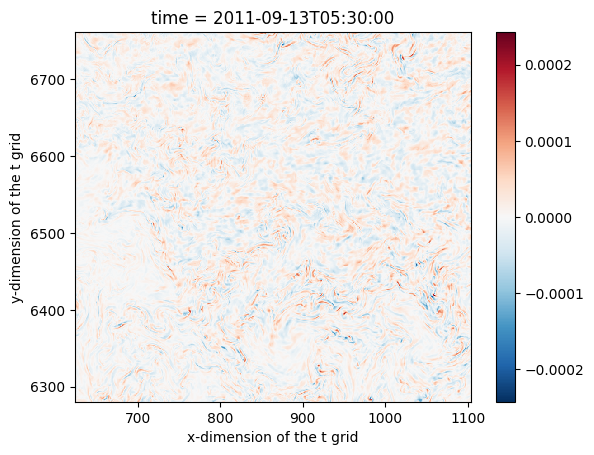

In [7]:
WB.isel(time=0).plot()

In [21]:
ds_T = xr.open_dataset(PATH_smooth+'ds_T.nc',engine="h5netcdf")
ds_S = xr.open_dataset(PATH_smooth+'ds_S.nc',engine="h5netcdf")
ds_W = xr.open_dataset(PATH_smooth+'ds_W.nc',engine="h5netcdf")

In [16]:
# find min and max i and j to crop to 10X10 degrees

i_min = np.max([ds_T.i.min().values, ds_S.i.min().values, ds_W.i.min().values])
i_max = np.min([ds_T.i.max().values, ds_S.i.max().values, ds_W.i.max().values])
j_min = np.max([ds_T.j.min().values, ds_S.j.min().values, ds_W.j.min().values])
j_max = np.min([ds_T.j.max().values, ds_S.j.max().values, ds_W.j.max().values])


#define slice to 480 index

if i_min+480>i_max:
    print('cropped region error in i')
elif j_min+480>j_max:
    print('cropped region error in j')
else:
    i_slice = slice(i_min,i_min+480)
j_slice = slice(j_min,j_min+480)



# merge datasets

ds_3d =xr.merge([ds_T.sel(i=i_slice,j=j_slice), ds_S.sel(i=i_slice,j=j_slice), ds_W.sel(i=i_slice,j=j_slice)])


# define grids 
grid_3d = xgcm.Grid(ds_3d)


# sigma from temp and salt, using the fastjmd95 package

# reference density 
rho0 = 1000 #kg/m^3

# potential density anomaly 
# with the reference pressure of 0 dbar and ρ0 = 1000 kg m−3
sigma0 = jmd95numba.rho(ds_3d.Salt.chunk(chunks={'time': 1, 'j': ds_3d.j.size, 'i': ds_3d.i.size}),
                 ds_3d.Theta.chunk(chunks={'time': 1, 'j': ds_3d.j.size, 'i': ds_3d.i.size}), 0) - rho0


# sigma0 at 10m depth for reference

sigma0_10m = sigma0.isel(k=6).broadcast_like(sigma0).chunk(chunks={'time': 1, 'j': ds_3d.j.size, 'i': ds_3d.i.size})
delta_sigma = sigma0 - sigma0_10m
del sigma0_10m


# gravity
G = 9.81 #m/s^2

# buoyancy
B = -G*sigma0/rho0
B = B.rename('Buoyancy')
del sigma0

# horizontal x buoyancy gradient
B_x = B.diff(dim='i')/B.dxF
B_x.where(delta_sigma<=0.03).mean(dim="k",skipna=True).to_netcdf(PATH_PP+'B_x.nc',engine='h5netcdf')
del B_x

# horizontal y buoyancy gradient
B_y = B.diff(dim='j')/B.dyF
B_y.where(delta_sigma<=0.03).mean(dim="k",skipna=True).to_netcdf(PATH_PP+'B_y.nc',engine='h5netcdf')
del B_y

'''
# interp W 
W_interp = grid_3d.interp(ds_3d.W,'Z', boundary='extend')
W_interp = W_interp.chunk(chunks={'time': 1, 'j': W_interp.j.size, 'i': W_interp.i.size, 'k': W_interp.k.size})

del grid_3d, ds_3d

WB = W_interp * B
WB.where(delta_sigma<=0.03).mean(dim="k",skipna=True).to_netcdf(PATH_PP+'WB.nc',engine='h5netcdf')
del WB
'''


/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


'\n# interp W \nW_interp = grid_3d.interp(ds_3d.W,\'Z\', boundary=\'extend\')\nW_interp = W_interp.chunk(chunks={\'time\': 1, \'j\': W_interp.j.size, \'i\': W_interp.i.size, \'k\': W_interp.k.size})\n\ndel grid_3d, ds_3d\n\nWB = W_interp * B\nWB.where(delta_sigma<=0.03).mean(dim="k",skipna=True).to_netcdf(PATH_PP+\'WB.nc\',engine=\'h5netcdf\')\ndel WB\n'

In [ ]:
# # cospectrum of w and b at the surface

B_drop = B.drop(['CS', 'SN', 'Depth', 'dxF', 'dyF', 'rA', 'XC', 'YC','hFacC']).fillna(0)
del B

#  spectra
import xrft

WB_cross_spectra = xrft.isotropic_cross_spectrum(W_interp, B_drop, dim=['i','j'], 
                                       detrend='linear', window=True).compute().mean('time')


#save spectra
WB_cross_spectra.real.to_netcdf(PATH_PP+'WB_cross_spectra_z.nc',engine='h5netcdf')


# save max over mixed layer depth average
# load 3d data
ds_T = xr.open_dataset(PATH_smooth+'ds_T.nc',engine="h5netcdf")
HML = xr.open_dataarray(PATH_PP+'HML.nc',engine="h5netcdf")

k_HML = WB_cross_spectra.k.where(ds_T.Z<HML.mean()).min(dim="k",skipna=True)
WB_spectra_mld = WB_cross_spectra.real.sel(k=slice(0,k_HML)).mean('k')

dx = ds_T.dxF.mean()
k_r = WB_cross_spectra.freq_r/dx/1e-3
k_r_max = WB_spectra_mld.freq_r.where(WB_spectra_mld*k_r == (WB_spectra_mld*k_r).max(),drop=True)/dx/1e-3
L_max = 1/k_r_max

(WB_spectra_mld*k_r).to_netcdf(PATH_PP+'WB_kr_cross_spectra_mld.nc',engine='h5netcdf')
k_r_max.to_netcdf(PATH_PP+'k_r_max_mld.nc',engine='h5netcdf')

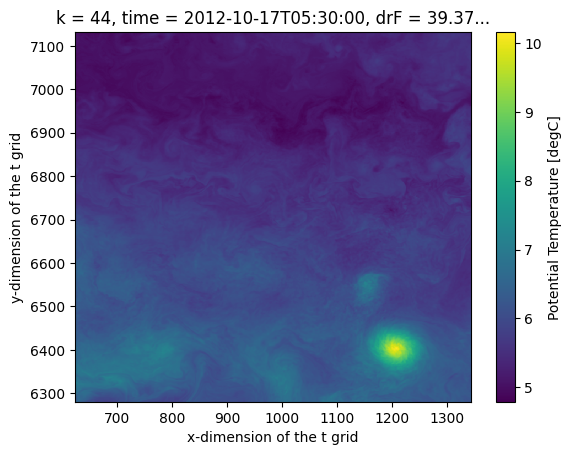

In [25]:
ds_T.Theta.isel(time=800,k=-1).plot()

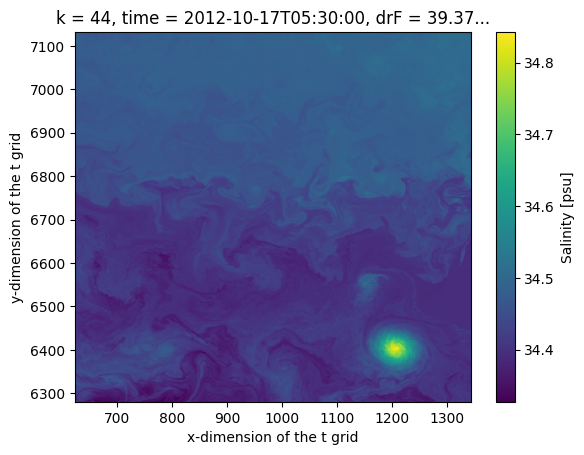

In [26]:
ds_S.Salt.isel(time=800,k=-1).plot()

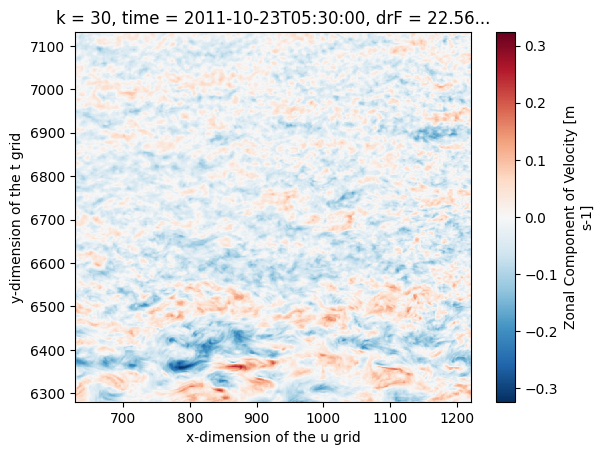

In [29]:
ds_U = xr.open_dataset(PATH_smooth+'ds_U.nc',engine="h5netcdf")
ds_U.U.isel(time=80,k=30).plot()

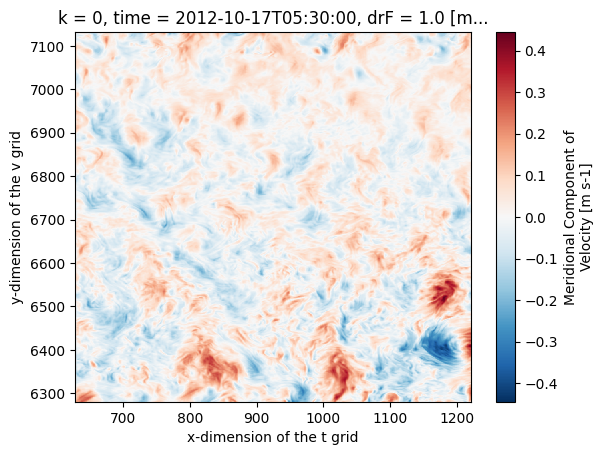

In [33]:
ds_V = xr.open_dataset(PATH_smooth+'ds_V.nc',engine="h5netcdf")
ds_V.V.isel(time=800,k=0).plot()

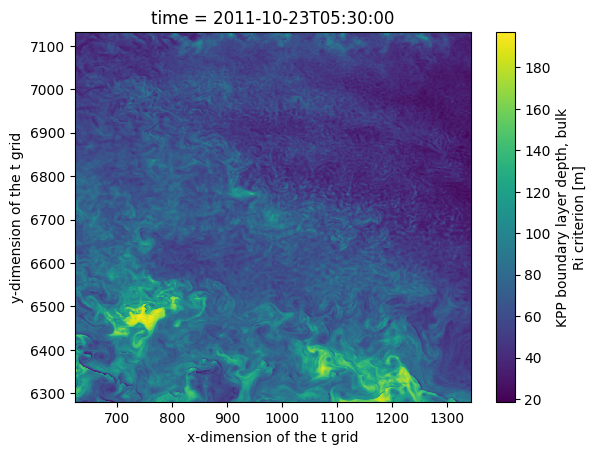

In [36]:
ds_HBL = xr.open_dataset(PATH_smooth+'ds_HBL.nc',engine="h5netcdf")
ds_HBL.KPPhbl.isel(time=80).plot()

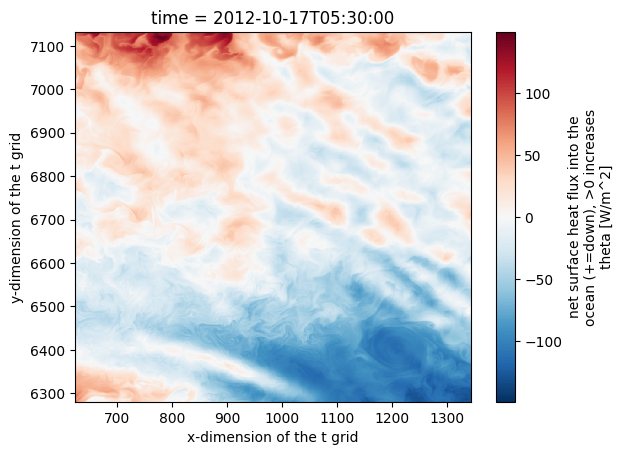

In [38]:
ds_Q = xr.open_dataset(PATH_smooth+'ds_Q.nc',engine="h5netcdf")
ds_Q.oceQnet.isel(time=800).plot()

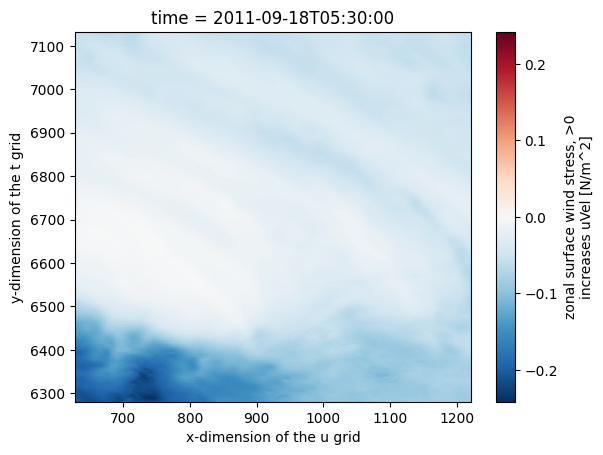

In [41]:
ds_TAUX = xr.open_dataset(PATH_smooth+'ds_TAUX.nc',engine="h5netcdf")
ds_TAUX.oceTAUX.isel(time=10).plot()

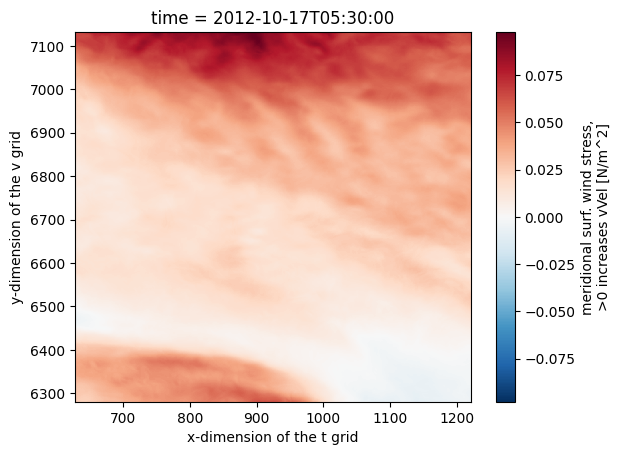

In [44]:
ds_TAUY = xr.open_dataset(PATH_smooth+'ds_TAUY.nc',engine="h5netcdf")
ds_TAUY.oceTAUY.isel(time=800).plot()